# **Project Title: Colorectal cancer prediction**

**Done by Pavan Kumar Sanjay**


***Project Goal: My goal with this project is to study and analyse the different causes of Colorectal Cancer in the dataset and to be able create a model based on this analysis that will help determine predict the survival of a person .***

Dataset Link:https://www.kaggle.com/datasets/ankushpanday1/colorectal-cancer-risk-and-survival-data/data

**Github Link:**https://rockaroll.github.io/

**Github Repo Link:**https://github.com/rockaroll/rockaroll.github.io.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
#Loading Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/colorectal_cancer_prediction.csv')

In [ ]:
#Priniting first 5 columns
df.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


**Description Dataset: The dataset has 89945 rows and 30 columns. Some of these attributes include Patient_ID, Age, Gender, BMI and Survival Status**

*Questions:*

*1.Determining whether the person has survived or not?*

*2.Choosing the most relevent causes of colorectal cancer based on question 1.*

In [ ]:
#Details of Dataset
print('Size of dataset:',df.shape)
print('\n')
print('Attributes in the Dataset:',df.info())

Size of dataset: (89945, 30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  obje

# **1. Tidiying Data**

In [ ]:
#Checking for Null Values
i1=0
for i in df.isnull():
  if i==True:
    i1+=1
print('Number of Null values in dataset:',i1)

Number of Null values in dataset: 0


# **2. EDA of Dataset**

Percentage of people who survived 74.8690866640725
Percentage of people who are deceased 25.130913335927513


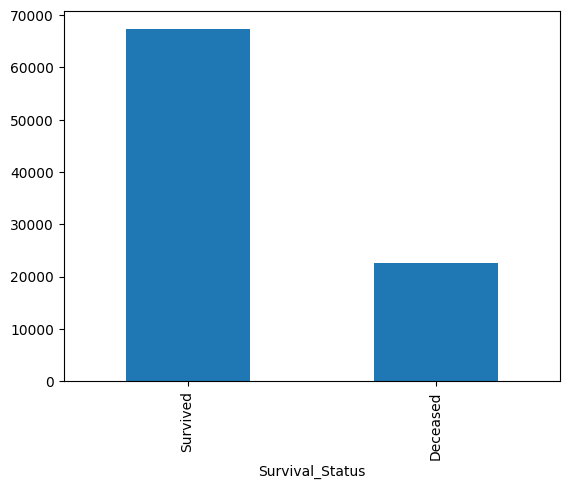

In [ ]:
#Using Value Counts function
s=df['Survival_Status'].value_counts()
s.plot.bar()
print('Percentage of people who survived',100*(s.iloc[0]/len(df)))
print('Percentage of people who are deceased',100*(s.iloc[1]/len(df)))

Data is inbalanced and has more observations of patients who have survived over people who are deceased

**a. Analysis of Categorical Features**

In [ ]:
#Making a copy of the original dataset and then droping all the quantitative variables
df1=df.copy()
df1=df1[:]
cont_features=['Patient_ID','Age','BMI','Time_to_Recurrence']
df1.drop(cont_features,axis=1,inplace=True)
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   89945 non-null  object
 1   Race                     89945 non-null  object
 2   Region                   89945 non-null  object
 3   Urban_or_Rural           89945 non-null  object
 4   Socioeconomic_Status     89945 non-null  object
 5   Family_History           89945 non-null  object
 6   Previous_Cancer_History  89945 non-null  object
 7   Stage_at_Diagnosis       89945 non-null  object
 8   Tumor_Aggressiveness     89945 non-null  object
 9   Colonoscopy_Access       89945 non-null  object
 10  Screening_Regularity     89945 non-null  object
 11  Diet_Type                89945 non-null  object
 12  Physical_Activity_Level  89945 non-null  object
 13  Smoking_Status           89945 non-null  object
 14  Alcohol_Consumption      89945 non-nul

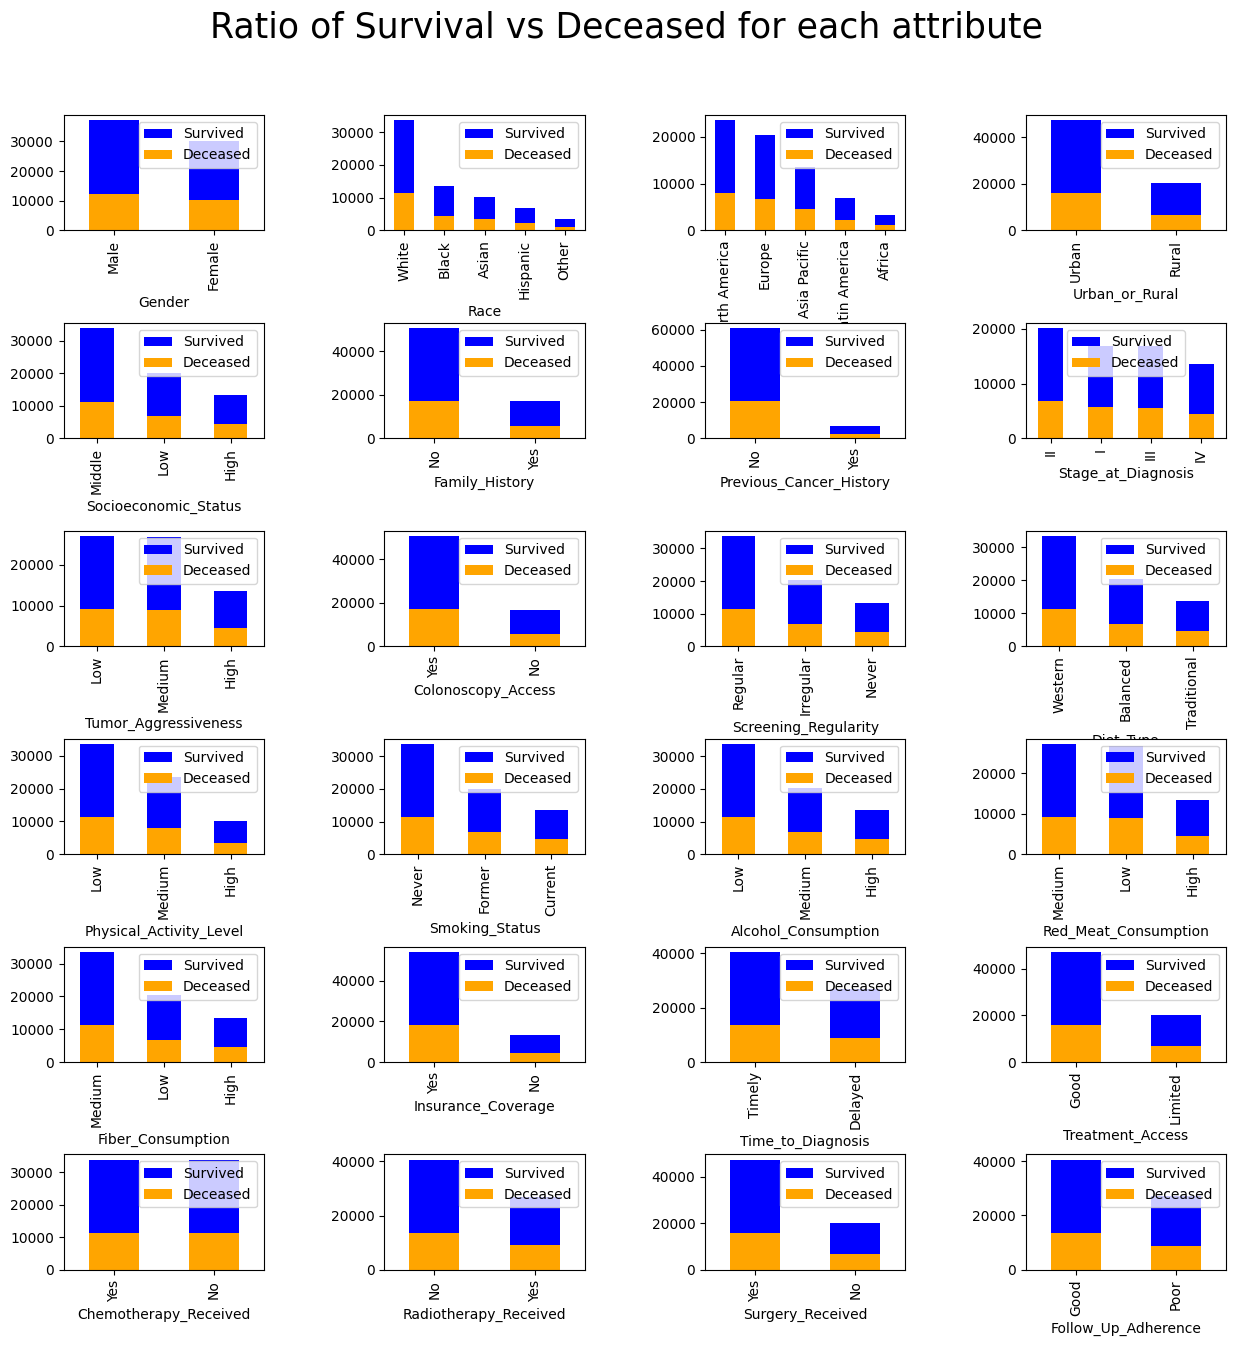

In [ ]:
#Using subplots of different variables to analyse them
s=df1.keys()
fig,ax=plt.subplots(6,4,figsize=(15,15))
plt.subplots_adjust(wspace=0.6,hspace=0.8)
fig.suptitle('Ratio of Survival vs Deceased for each attribute',fontsize=25,y=0.95)
for i,ax1 in zip(s,ax.ravel()):
  if(i!='Survival_Status'):
    df1[df1['Survival_Status']=='Survived'][i].value_counts().plot.bar(ax=ax1,color='blue')
    df1[df1['Survival_Status']=='Deceased'][i].value_counts().plot.bar(ax=ax1,color='orange')
    ax1.legend(['Survived','Deceased'])


Lets see some of these attributes in more detail. Ill be picking the following graphs from above and analyse them:

In [ ]:
#Defining function to calculate the ratio between two quantities
def Ratio(dfa,dfb,KEY):
  return float(dfa[KEY]/dfb[KEY])

1. Gender

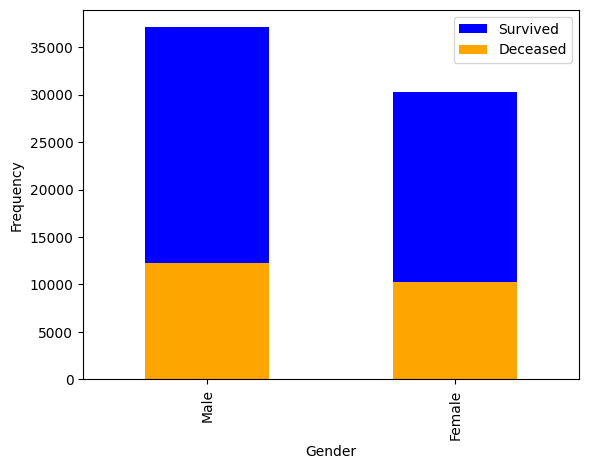

In [ ]:
#Plotting a Bar Graph like I did before for the subplots
df1[df1['Survival_Status']=='Survived']['Gender'].value_counts().plot.bar(color='blue')
df1[df1['Survival_Status']=='Deceased']['Gender'].value_counts().plot.bar(color='orange')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(df1['Survival_Status'].unique())

In [ ]:
# Calculating the ratios of each unique value for a attribute. This has been repeated 6 other times.
a=df1[df1['Survival_Status']=='Survived']['Gender'].value_counts()
b=df1[df1['Survival_Status']=='Deceased']['Gender'].value_counts()
print('Survival-Deceased Ratio for Males:',Ratio(a,b,'Male'))
print('Survival-Deceased Ratio for Females:',Ratio(a,b,'Female'))

Survival-Deceased Ratio for Males: 3.011782870144645
Survival-Deceased Ratio for Females: 2.940182559720334


On plotting this attribute here we can sense that more male observations have been taken over females. However the ratio between survived and deceased for both genders is approximately the same. So this wont be an effective attribute in ouur model.

2. Insurance Coverage

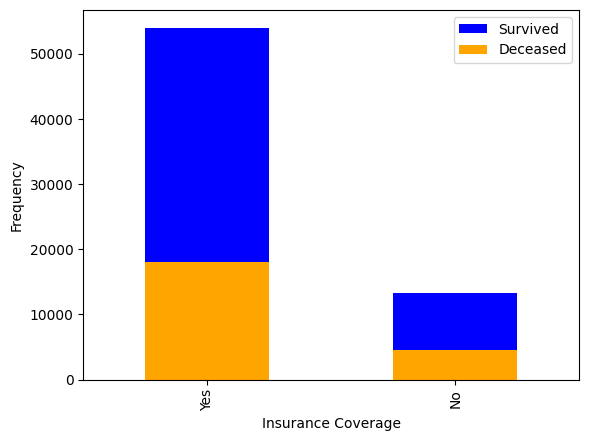

In [ ]:
df1[df1['Survival_Status']=='Survived']['Insurance_Coverage'].value_counts().plot.bar(color='blue')
df1[df1['Survival_Status']=='Deceased']['Insurance_Coverage'].value_counts().plot.bar(color='orange')
plt.xlabel('Insurance Coverage')
plt.ylabel('Frequency')
plt.legend(df1['Survival_Status'].unique())

Insurance coverage is very important as it not only makes it easier to avail treatment for diseases like cancer but also makes it more cost efficient. Clearly as observed in the graph that the number of people who have insurance is higher that the number of people that does not have insurance. This makes it an essential attribute in the analysis.

3. Diet Type

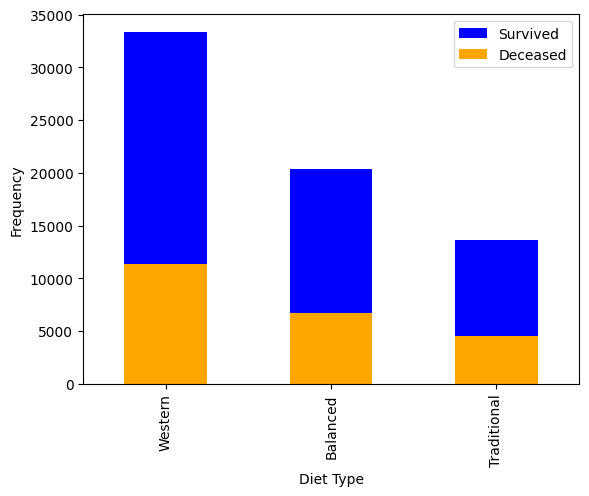

In [ ]:
df1[df1['Survival_Status']=='Survived']['Diet_Type'].value_counts().plot.bar(color='blue')
df1[df1['Survival_Status']=='Deceased']['Diet_Type'].value_counts().plot.bar(color='orange')
plt.xlabel('Diet Type')
plt.ylabel('Frequency')
plt.legend(df1['Survival_Status'].unique())

In [ ]:
a=df1[df1['Survival_Status']=='Survived']['Diet_Type'].value_counts()
b=df1[df1['Survival_Status']=='Deceased']['Diet_Type'].value_counts()
for i in df['Diet_Type'].unique():
  print('Survivors-Desceased ratio for '+i+' Diet',Ratio(a,b,i))

Survivors-Desceased ratio for Western Diet 2.9409431467606875
Survivors-Desceased ratio for Balanced Diet 3.0273728057125857
Survivors-Desceased ratio for Traditional Diet 3.0033061494379547


For all three diets the ratios are the same so it this attribute wont be a good choice for the model

4. Physical Activity Level

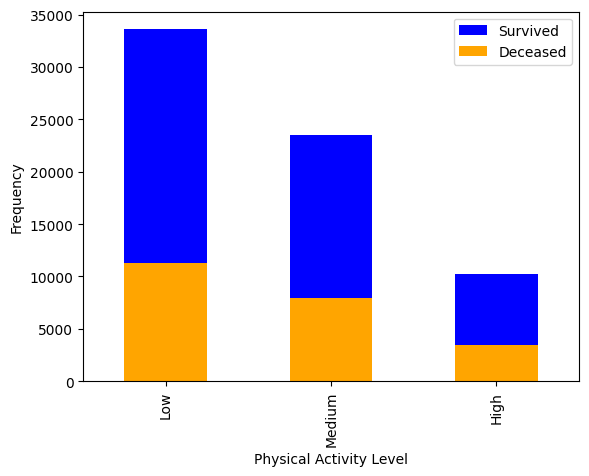

In [ ]:
df1[df1['Survival_Status']=='Survived']['Physical_Activity_Level'].value_counts().plot.bar(color='blue')
df1[df1['Survival_Status']=='Deceased']['Physical_Activity_Level'].value_counts().plot.bar(color='orange')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.legend(df1['Survival_Status'].unique())

In [ ]:
a=df1[df1['Survival_Status']=='Survived']['Physical_Activity_Level'].value_counts()
b=df1[df1['Survival_Status']=='Deceased']['Physical_Activity_Level'].value_counts()
for i in df['Physical_Activity_Level'].unique():
  print('Survivors-Desceased for '+i+' Physical_Activity_Level',Ratio(a,b,i))

Survivors-Desceased for Low Physical_Activity_Level 2.981100266193434
Survivors-Desceased for Medium Physical_Activity_Level 2.9746995572422517
Survivors-Desceased for High Physical_Activity_Level 2.983085447652377


5. Alcohol Consumption

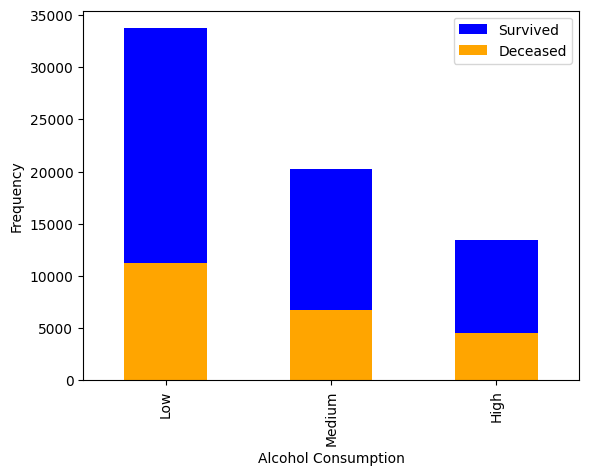

In [ ]:
df1[df1['Survival_Status']=='Survived']['Alcohol_Consumption'].value_counts().plot.bar(color='blue')
df1[df1['Survival_Status']=='Deceased']['Alcohol_Consumption'].value_counts().plot.bar(color='orange')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.legend(df1['Survival_Status'].unique())

In [ ]:
a=df1[df1['Survival_Status']=='Survived']['Alcohol_Consumption'].value_counts()
b=df1[df1['Survival_Status']=='Deceased']['Alcohol_Consumption'].value_counts()
for i in df['Alcohol_Consumption'].unique():
  print('Survivors-Desceased for '+i+' Alcohol Consumption',Ratio(a,b,i))

Survivors-Desceased for Low Alcohol Consumption 2.9902482269503547
Survivors-Desceased for High Alcohol Consumption 2.941383095499451
Survivors-Desceased for Medium Alcohol Consumption 2.9861131629487367


Despite the very close values in terms of Alcohol Consumption . I am still planning to include this in the model as the concluscion of low alcohol consumption increases the ratio value.

6. Smoking Status

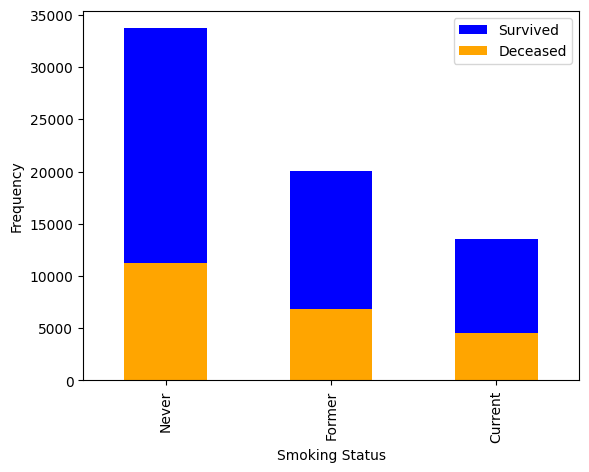

In [ ]:
df1[df1['Survival_Status']=='Survived']['Smoking_Status'].value_counts().plot.bar(color='blue')
df1[df1['Survival_Status']=='Deceased']['Smoking_Status'].value_counts().plot.bar(color='orange')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.legend(df1['Survival_Status'].unique())

In [ ]:
a=df1[df1['Survival_Status']=='Survived']['Smoking_Status'].value_counts()
b=df1[df1['Survival_Status']=='Deceased']['Smoking_Status'].value_counts()
for i in df['Smoking_Status'].unique():
  print('Survivors-Desceased for '+i+' Smoking_Status',Ratio(a,b,i))

Survivors-Desceased for Never Smoking_Status 2.9991102411246553
Survivors-Desceased for Former Smoking_Status 2.940814532669206
Survivors-Desceased for Current Smoking_Status 2.9874421678783873


Smoking is one of the biggest causes of colorectal cancer and despite the ratios being very close to each other. based on the graph the number of people who have survived due to never smoking is more.

7. Race

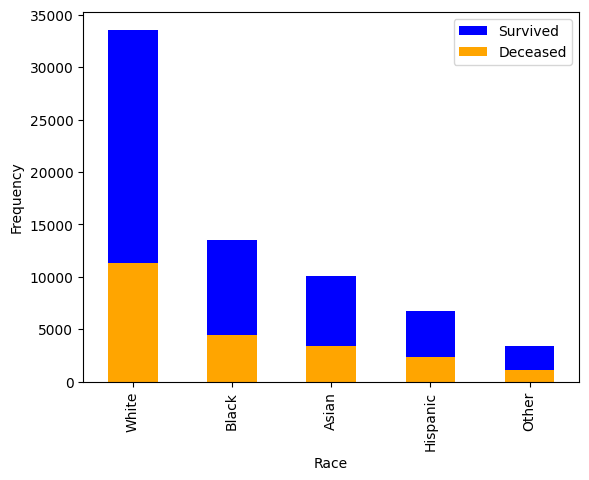

In [ ]:
df1[df1['Survival_Status']=='Survived']['Race'].value_counts().plot.bar(color='blue')
df1[df1['Survival_Status']=='Deceased']['Race'].value_counts().plot.bar(color='orange')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.legend(df1['Survival_Status'].unique())

In [ ]:
a=df1[df1['Survival_Status']=='Survived']['Race'].value_counts()
b=df1[df1['Survival_Status']=='Deceased']['Race'].value_counts()
for i in df['Race'].unique():
  print('Survivors-Desceased for '+i+' people',Ratio(a,b,i))

Survivors-Desceased for Other people 3.1499540018399266
Survivors-Desceased for Black people 3.0297672336615937
Survivors-Desceased for White people 2.969490626105412
Survivors-Desceased for Hispanic people 2.9151147682979643
Survivors-Desceased for Asian people 2.934149184149184


While different people have different cultures and this can result in different food choices. This is not an effective attribute as more samples exist of white people compared to the other attributes.

**b. Analysis of Quantitative Variables**

In [ ]:
#Making a second copy and dropping Patient ID
df2=df.copy()
s1=['Patient_ID']
df2=df2.drop(s1,axis=1)
df2.describe()

,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000
mean,54.332892,29.268105,29.543299
std,20.182220,6.211668,17.268440
min,20.000000,18.500000,0.000000
25%,37.000000,23.900000,15.000000
50%,54.000000,29.300000,30.000000
75%,72.000000,34.600000,44.000000
max,89.000000,40.000000,59.000000


In [ ]:
#Sampling and counting. Repeated again in the next cell
a=df2[df2['Survival_Status']=='Survived']['BMI']
o=0
for s in a:
  if(s>30):
    o+=1
print('Percentage of Suvivors with unhealthy BMI=',float(o/len(a))*100)


Percentage of Suvivors with unhealthy BMI= 46.60459452636581


In [ ]:
a=df2[df2['Survival_Status']=='Deceased']['BMI']
o=0
for s in a:
  if(s<=30):
    o+=1
print('Percentage of Deceased with healthy BMI=',float(o/len(a))*100)

Percentage of Deceased with healthy BMI= 53.90638824986728


BMI is a very complex quantity to evaluate as seen above the contadictions in the percentage of survivors and deceased makes it a difficult attribute to include in our model. The helthy BMI levels exist between 0 to 30 anything above this quantity causes problems.

In [ ]:
sd=df2[df2['Survival_Status']=='Survived']
sd1=df2[df2['Survival_Status']=='Deceased']
print('Percentage of Elders who survived colorectal cancer',float(len(sd[df2['Age']>=60])/len(df2))*100)
print('Percentage of Young people who survived colorectal cancer',float(len(sd[df2['Age']<60])/len(df2))*100)
print('Percentage of Elders who did not survive colorectal cancer',float(len(sd1[df2['Age']>=60])/len(df2))*100)
print('Percentage of Young people who did not survive colorectal cancer',float(len(sd1[df2['Age']<60])/len(df2))*100)

Percentage of Elders who survived colorectal cancer 31.85946967591306
Percentage of Young people who survived colorectal cancer 43.00961698815943
Percentage of Elders who did not survive colorectal cancer 10.61426427261104
Percentage of Young people who did not survive colorectal cancer 14.516649063316473


Age is not a very good attribute for the modelling process but Time to recurrence should be included as its values above will be helpful information for modelling.

**c. Analysis of the correlation between all the Variables**

In [ ]:
# Selection of only categorcial variables
categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#Using one hot encoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(df2[categorical_columns])
one_hot_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))
df_encoded=pd.concat([df2,one_hot_df],axis=1)
df_encoded=df_encoded.drop(categorical_columns,axis=1)

In [ ]:
#Printing a Sample
df_encoded.head()

,Age,BMI,Time_to_Recurrence,Gender_Female,Gender_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,...,Radiotherapy_Received_No,Radiotherapy_Received_Yes,Surgery_Received_No,Surgery_Received_Yes,Follow_Up_Adherence_Good,Follow_Up_Adherence_Poor,Survival_Status_Deceased,Survival_Status_Survived,Recurrence_No,Recurrence_Yes
0,71,33.0,16,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,34,33.1,28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,80,20.7,26,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,40,38.9,44,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,43,24.8,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
#Creating Correlation matrix
sd=df_encoded[['Age','BMI','Time_to_Recurrence','Radiotherapy_Received_No','Radiotherapy_Received_Yes','Surgery_Received_No','Surgery_Received_Yes','Survival_Status_Deceased','Survival_Status_Survived']]

<Axes: >

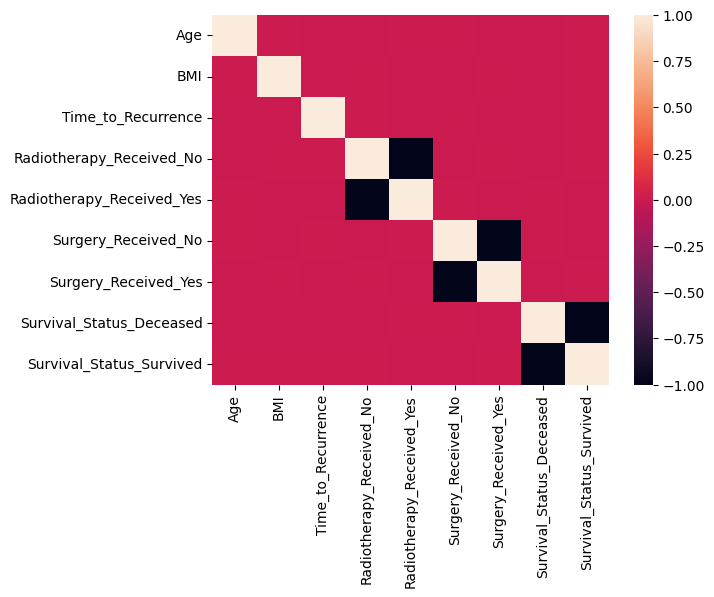

In [ ]:
#Final Heatmap
sns.heatmap(sd.corr())

It shows here that most of the variables are not very correlated with each other and lie between the range of -0.25 to 0.25.

# **3. Modelling**

**Modelling Ideas:**

Amongst many supervised learning models the following are my choices:

1. KNN
2. Decision Tree
3. Naive Bayes
4. Random Forest Algorithm
5. Logistic Regression
6. Balanced Bagging Classifier
7. Multinomial Naive Bayes

**Note: Running the KNN algorithms training code will take approximately half an hour. In the submission there will also be model files which you can load into the collab module. You can then test these models on either training,validation or test data.Use the github repo link to get the model files.**

In [ ]:
#Copiying Initial Dataset
df3=df.copy()

In [ ]:
# Importing necessary modules and classifiers
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pickle

In [ ]:
def preprocessing(xtrain,xtest,xval,scale):
  #Converting dataset into diictionaries
  xtrain_dict=xtrain.to_dict(orient='records')
  xtest_dict=xtest.to_dict(orient='records')
  xval_dict=xval.to_dict(orient='records')
  #Converting categorical variables into to one hot
  vec= DictVectorizer(sparse=False)
  vec.fit(xtrain_dict)
  x_train_d=vec.transform(xtrain_dict)
  x_test_d=vec.transform(xtest_dict)
  x_val_d=vec.transform(xval_dict)
  #Three different types of scaling
  if(scale=='Standardizer'):
    scaler1=StandardScaler()
    scaler1.fit(x_train_d)
    x_train_sc=scaler1.transform(x_train_d)
    x_test_sc=scaler1.transform(x_test_d)
    x_val_sc=scaler1.transform(x_val_d)
  elif(scale=='Normalizer'):
    scaler1=Normalizer(norm='l2')
    scaler1.fit(x_train_d)
    x_train_sc=scaler1.transform(x_train_d)
    x_test_sc=scaler1.transform(x_test_d)
    x_val_sc=scaler1.transform(x_val_d)
  else:
    x_train_sc=x_train_d
    x_val_sc=x_val_d
    x_test_sc=x_test_d
  return x_train_sc,x_val_sc,x_test_sc

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

In [ ]:
df3.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [ ]:
#Currently dropping these columns further experimentation to be done
df3=df3.drop(columns=['Patient_ID','Gender','Race'])

In [ ]:
#Splitting Data
X=df3[[i for i in df3.keys() if i!='Survival_Status']]
Y=df3['Survival_Status'].map({
    'Survived':1,
    'Deceased':0
})
X_train,X_testval,y_train,y_testval=train_test_split(X,Y,test_size=0.3,shuffle=True)
X_val,X_test1,y_val,y_test1=train_test_split(X_testval,y_testval,test_size=0.5,shuffle=True)

In [ ]:
X_train_sc,X_val_sc,X_test_sc=preprocessing(X_train,X_test1,X_val,'Normalizer')

In [ ]:
y_val.shape

(13492,)

**a. KNN Modeling**

In [ ]:
#KNN modeler
def KNN(k,x_train12,y_train12,x_test1,y_test1):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train12,y_train12)
  trainpred=model.predict(x_train12)
  predsa=model.predict(x_test1)
  return (accuracy_score(y_train12,trainpred),accuracy_score(y_test1,predsa))

In [ ]:
#taking accuracy values from k=1 to30
ACC=[]
for i in range(1,30,1):
  ACC.append(KNN(i,X_train_sc,y_train,X_val_sc,y_val))

The best K-value is 28 which has a validation accuracy of 75.78565075600355% and training accuracy of 74.77168405838535


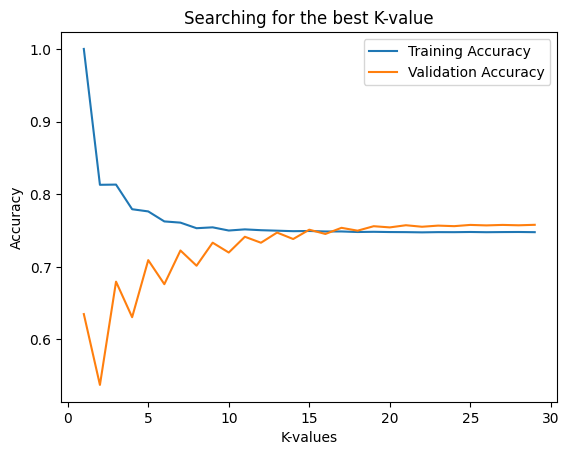

In [ ]:
#Plotting graph with the validation set
ACC=np.asarray(ACC)
K=np.arange(1,30,1)
plt.plot(K,ACC[:,0],label='Training Accuracy')
plt.plot(K,ACC[:,1],label='Validation Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Searching for the best K-value')
BestKValue=K[np.argmax(ACC[:,1])]
print('The best K-value is '+str(np.argmax(ACC[:,1]))+' which has a validation accuracy of '+str(max(ACC[:,1])*100)+'%'+' and training accuracy of '+str(ACC[np.argmax(ACC[:,1]),0]*100))

In [ ]:
#Test accuracy
modelK=KNeighborsClassifier(n_neighbors=BestKValue)
modelK.fit(X_train_sc,y_train)
predsa1=modelK.predict(X_test_sc)
print('Testing Accuracy is:',accuracy_score(y_test1,predsa1)*100)

Testing Accuracy is: 74.14764304773199


<Axes: >

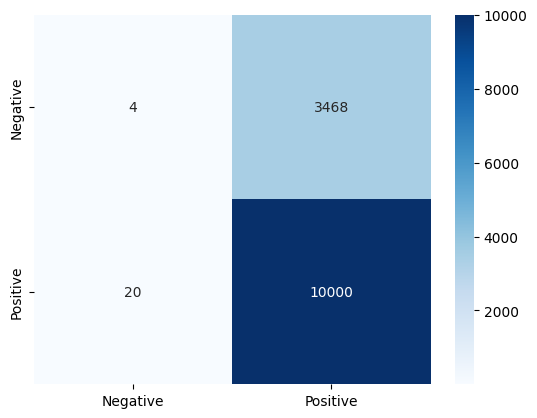

In [ ]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test1,predsa1),fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],annot=True)

Similarly experimenting with othe algorithms

**b.Decision Trees**

In [ ]:
def DecisionTree(X_t,X_v,y_t,y_v,d):
  clf=DecisionTreeClassifier(criterion='entropy',max_depth=d)
  cl=clf.fit(X_t,y_t)
  y_trpred=clf.predict(X_t)
  y_valpred=clf.predict(X_v)
  return (accuracy_score(y_t,y_trpred),accuracy_score(y_v,y_valpred))

In [ ]:
a=[]
for i in range(1,15,1):
  a.append(DecisionTree(X_train_sc,X_val_sc,y_train,y_val,i))

The best D-value is 1 which has a validation accuracy of 75.97835754521198% and training accuracy of 74.76056606470672


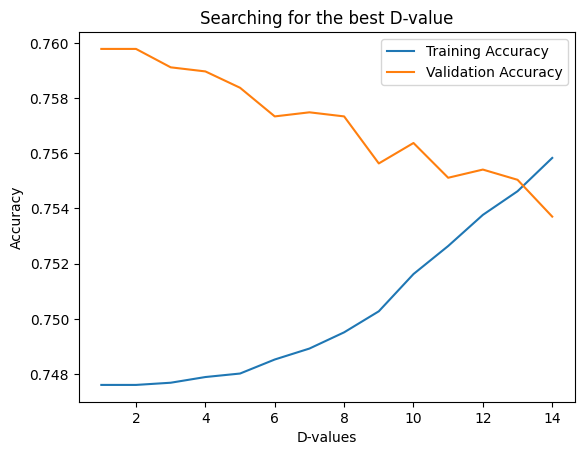

In [ ]:
a=np.asarray(a)
b=np.arange(1,15,1)
plt.plot(b,a[:,0],label='Training Accuracy')
plt.plot(b,a[:,1],label='Validation Accuracy')
plt.xlabel('D-values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Searching for the best D-value')
BestdValue=k[np.argmax(a[:,1])]
print('The best D-value is '+str(BestdValue)+' which has a validation accuracy of '+str(max(a[:,1])*100)+'%'+' and training accuracy of '+str(a[np.argmax(a[:,1]),0]*100))

In [ ]:
modelDT=DecisionTreeClassifier(criterion='entropy',max_depth=BestdValue)
modelDT.fit(X_train_sc,y_train)
predsa1=modelDT.predict(X_test_sc)
print('Testing Accuracy is:',accuracy_score(y_test1,predsa1)*100)

Testing Accuracy is: 74.26623184109101


In [ ]:
#Classification report
print(classification_report(y_test1,predsa1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3472
           1       0.74      1.00      0.85     10020

    accuracy                           0.74     13492
   macro avg       0.37      0.50      0.43     13492
weighted avg       0.55      0.74      0.63     13492



**c.Naive Bayes**

In [ ]:
Nb=GaussianNB()

In [ ]:
modelNB=Nb.fit(X_train_sc,y_train)
y_pred_nb=modelNB.predict(X_val_sc)


In [ ]:
print(classification_report(y_val,y_pred_nb))

              precision    recall  f1-score   support

           0       0.22      0.00      0.01      3241
           1       0.76      1.00      0.86     10251

    accuracy                           0.76     13492
   macro avg       0.49      0.50      0.43     13492
weighted avg       0.63      0.76      0.66     13492



<Axes: >

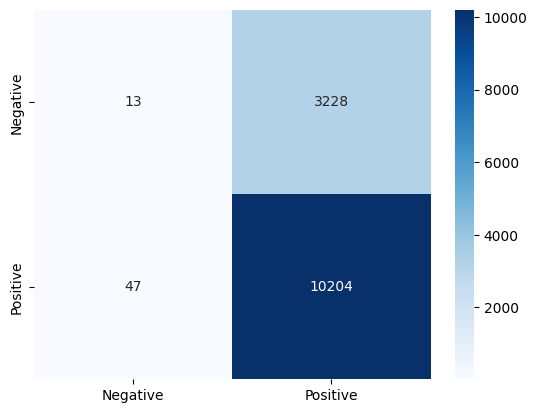

In [ ]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_val,y_pred_nb),fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],annot=True)

**d. Random Forest Classifier**

In [ ]:
modelr=RandomForestClassifier(random_state=10,criterion='gini')
modelr.fit(X_train_sc,y_train)
preds=modelr.predict(X_val_sc)
print('Validation Accuracy:',accuracy_score(y_val,preds))
print(classification_report(y_val,preds))


Validation Accuracy: 0.7592647494811741
              precision    recall  f1-score   support

           0       0.18      0.00      0.00      3241
           1       0.76      1.00      0.86     10251

    accuracy                           0.76     13492
   macro avg       0.47      0.50      0.43     13492
weighted avg       0.62      0.76      0.66     13492



Axes(0.125,0.11;0.62x0.77)


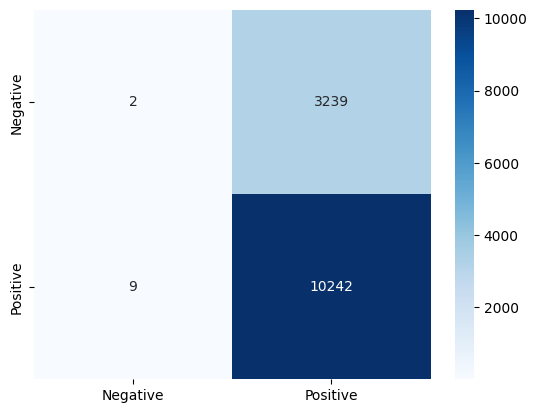

In [ ]:
print(sns.heatmap(confusion_matrix(y_val,preds),fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],annot=True))

**e. Balanced Bagging Classifier with Random Forest Classifier as the base**

In [ ]:
balanced_bagging_classifier = BalancedBaggingClassifier(modelr,sampling_strategy='auto',replacement=False,random_state=42)

In [ ]:
balanced_bagging_classifier.fit(X_train_sc, y_train)
y_pred1 = balanced_bagging_classifier.predict(X_val_sc)
print('Validation Accuracy:',accuracy_score(y_val,y_pred1))
print(classification_report(y_val,y_pred1))

Validation Accuracy: 0.6909279573080344
              precision    recall  f1-score   support

           0       0.22      0.12      0.15      3241
           1       0.76      0.87      0.81     10251

    accuracy                           0.69     13492
   macro avg       0.49      0.49      0.48     13492
weighted avg       0.63      0.69      0.65     13492



Axes(0.125,0.11;0.62x0.77)


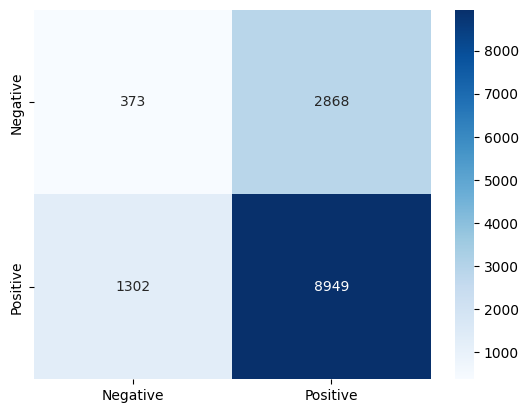

In [ ]:
print(sns.heatmap(confusion_matrix(y_val,y_pred1),fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],annot=True))

**f.Multinomial Naive Bayes**

In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train_sc,y_train)
preds=mnb.predict(X_val_sc)
print('Validation Accuracy:',accuracy_score(y_val,preds))

Validation Accuracy: 0.7597835754521197


<Axes: >

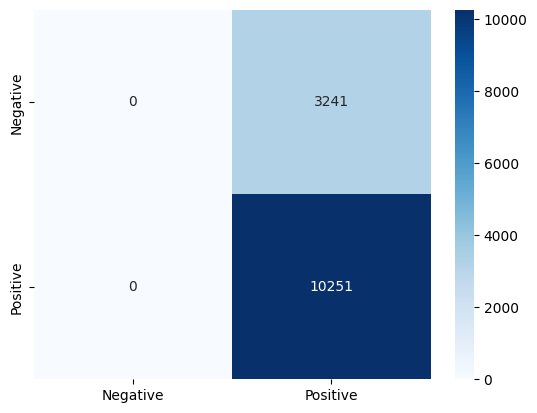

In [ ]:
sns.heatmap(confusion_matrix(y_val,preds),fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],annot=True)

**g. Logistic Regression**

In [ ]:
modlr=LogisticRegression()
modlr.fit(X_train_sc,y_train)
predlr=modlr.predict(X_val_sc)

Validation Accuracy: 0.7597835754521197


<Axes: >

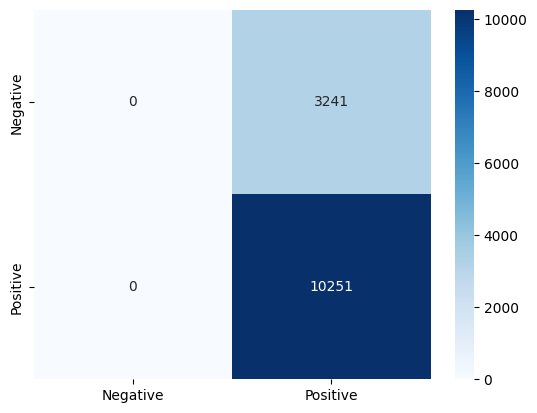

In [ ]:
print('Validation Accuracy:',accuracy_score(y_val,predlr))
sns.heatmap(confusion_matrix(y_val,predlr),fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],annot=True)

In [ ]:
print(classification_report(y_val,predlr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3241
           1       0.76      1.00      0.86     10251

    accuracy                           0.76     13492
   macro avg       0.38      0.50      0.43     13492
weighted avg       0.58      0.76      0.66     13492



**h. Balanced Bagging Classifier with Logistic Regression as the base**

In [ ]:
balanced_bagging_classifierlr = BalancedBaggingClassifier(modlr,sampling_strategy='auto',replacement=False,random_state=42)

In [ ]:
balanced_bagging_classifierlr.fit(X_train_sc, y_train)
y_predlr = balanced_bagging_classifierlr.predict(X_val_sc)
print('Validation Accuracy:',accuracy_score(y_val,y_predlr))
print(classification_report(y_val,y_predlr))

Validation Accuracy: 0.5128224132819449
              precision    recall  f1-score   support

           0       0.23      0.46      0.31      3241
           1       0.76      0.53      0.62     10251

    accuracy                           0.51     13492
   macro avg       0.49      0.49      0.47     13492
weighted avg       0.63      0.51      0.55     13492



**h. Balanced Bagging Classifier with KNN as the base**

In [ ]:
balanced_bagging_classifierK = BalancedBaggingClassifier(modelK,sampling_strategy='auto',replacement=False,random_state=42)
balanced_bagging_classifierK.fit(X_train_sc, y_train)
y_predlr = balanced_bagging_classifierK.predict(X_val_sc)
print('Validation Accuracy:',accuracy_score(y_val,y_predlr))
print(classification_report(y_val,y_predlr))

Validation Accuracy: 0.5089682774977765
              precision    recall  f1-score   support

           0       0.24      0.48      0.32      3241
           1       0.76      0.52      0.62     10251

    accuracy                           0.51     13492
   macro avg       0.50      0.50      0.47     13492
weighted avg       0.63      0.51      0.54     13492



We wont be using the last two algorithms as they have an accuracy of only 51%.

#**4.Saving models and getting results on test data**

**Note: Make sure the paths of your model.pkl files they depend on your system's configuration**

**Saving model configurations**

In [ ]:
#Dont run this if you have the original model.pkl files
pickle.dump(modelDT, open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelDT-I.pkl", 'wb'))
pickle.dump(modelr, open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelRFC-I.pkl", 'wb'))
pickle.dump(balanced_bagging_classifier, open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelBB-I.pkl", 'wb'))
pickle.dump(mnb, open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelMNB-I.pkl", 'wb'))
pickle.dump(Nb, open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelNB-I.pkl", 'wb'))
pickle.dump(modlr, open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelLR-I.pkl", 'wb'))
pickle.dump(modelK, open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelK-I.pkl", 'wb'))

**Loading Models for future use:**

In [ ]:
#Decision tree
modelDT=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelDT-I.pkl", 'rb'))
#Random Forest
modellr=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelRFC-I.pkl", 'rb'))
#Balanced Bagging Classifier
balanced_bagging_classifier=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelBB-I.pkl", 'rb'))
#Multinomial Naive Bayes
mnb=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelMNB-I.pkl", 'rb'))
#Gaussian Naive Bayes
Nb=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelNB-I.pkl", 'rb'))
#Logistic Regression
modlr=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelLR-I.pkl", 'rb'))
#KNN
modelK=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Intro To Data Science/Colorectal Cancer/Models/InitialModels/modelK-I.pkl", 'rb'))

**Printing Model accuracy and analysing other attributes:**

In [ ]:
#Printing Accuracies and getting predicted test labels
Y_predK=modelK.predict(X_test_sc)
Y_predDT=modelDT.predict(X_test_sc)
Y_predRandforest=modellr.predict(X_test_sc)
Y_predbbr=balanced_bagging_classifier.predict(X_test_sc)
Y_predmnb=mnb.predict(X_test_sc)
Y_prednb=Nb.predict(X_test_sc)
Y_predlr=modlr.predict(X_test_sc)
print('KNN accuracy:',accuracy_score(y_test1,Y_predK))
print('Decision Tree accuracy:',accuracy_score(y_test1,Y_predDT))
print('Random Forest accuracy:',accuracy_score(y_test1,Y_predRandforest))
print('Balanced Bagging Classifier accuracy:',accuracy_score(y_test1,Y_predbbr))
print('Multinomial Naive Bayes accuracy:',accuracy_score(y_test1,Y_predmnb))
print('Naive Bayes accuracy:',accuracy_score(y_test1,Y_prednb))
print('Logistic Regression accuracy:',accuracy_score(y_test1,Y_predlr))

KNN accuracy: 0.7414764304773199
Decision Tree accuracy: 0.7426623184109101
Random Forest accuracy: 0.7422917284316632
Balanced Bagging Classifier accuracy: 0.684998517640083
Multinomial Naive Bayes accuracy: 0.7426623184109101
Naive Bayes accuracy: 0.7399940705603321
Logistic Regression accuracy: 0.7426623184109101


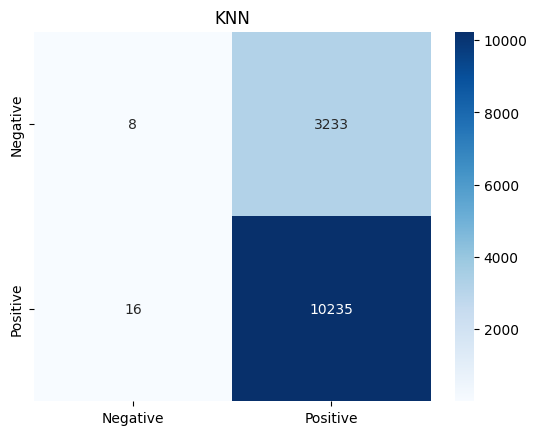

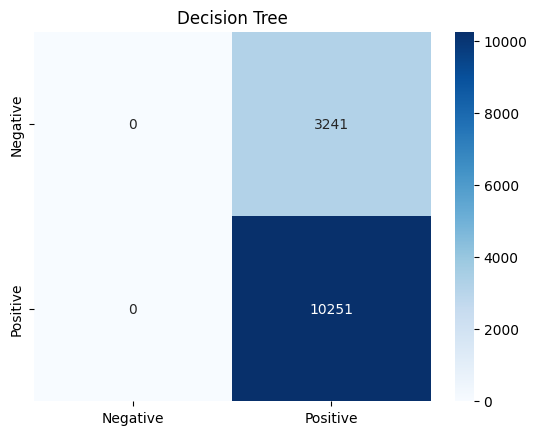

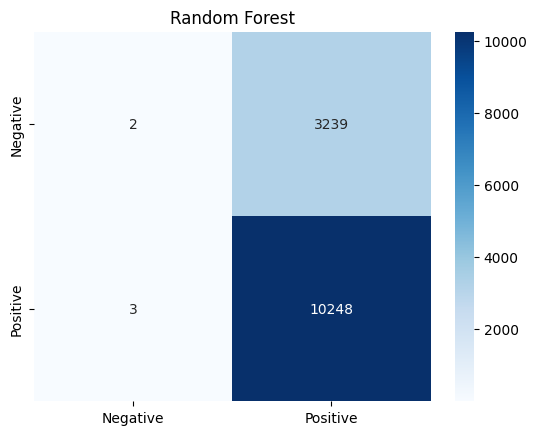

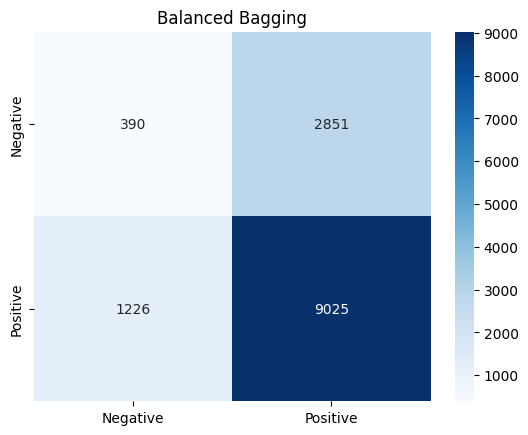

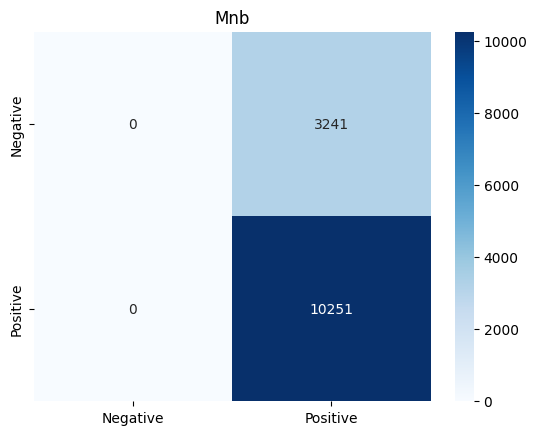

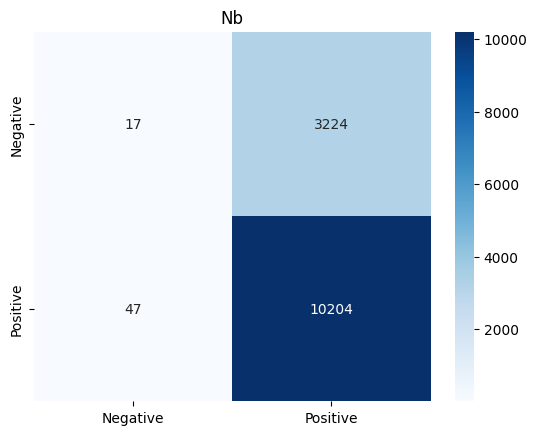

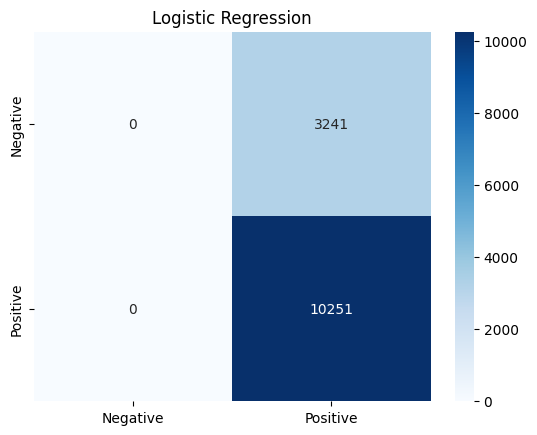

In [ ]:
#Confusion Matrixes for all the algorithms on the test data
dictlab={'KNN':Y_predK,'Decision Tree':Y_predDT,
         'Random Forest':Y_predRandforest,'Balanced Bagging':Y_predbbr,
         'Mnb':Y_predmnb,'Nb':Y_prednb,'Logistic Regression':Y_predlr}
for i in dictlab.keys():
  plt.figure()
  sns.heatmap(confusion_matrix(y_val,dictlab[i]),fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],annot=True)
  plt.title(i)

In [ ]:
for i in dictlab.keys():
  print("\033[1m"+i+"\033[0m")
  print(classification_report(dictlab[i],y_test1))

KNN
              precision    recall  f1-score   support

           0       0.00      0.17      0.00        24
           1       1.00      0.74      0.85     13468

    accuracy                           0.74     13492
   macro avg       0.50      0.45      0.43     13492
weighted avg       1.00      0.74      0.85     13492

Decision Tree
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.74      0.85     13492

    accuracy                           0.74     13492
   macro avg       0.50      0.37      0.43     13492
weighted avg       1.00      0.74      0.85     13492

Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.74      0.85     13487

    accuracy                           0.74     13492
   macro avg       0.50      0.37      0.43     13492
weighted avg       1.00      0.74      0.8

***Currently I believe that based on our test data results the Balanced bagging classifier which used the random forest classifier as a base has the best all rounder performance. While its accuracy is not as high as the rest it is still has lesser false positives then the other algorithms***